from https://github.com/lesommer/notebooks/blob/master/2018/2018-05-02_jls_plotting-NATL60-bathymetry.ipynb

In [13]:
import sys
### general purpose
import os
import numpy as np
import xarray as xr
import pandas as pd
### palette
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker
#import matplotlib.cm as cm
#div_cmap = mplcm.seismic
import cmocean
from cmocean import cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.io as sio

%matplotlib inline

In [4]:
bathy_file='/mnt/albert/equipes/meom/MODEL_SET/NATL60/NATL60-I/NATL60_v4.1_cdf_mesh_zgr.nc'
mask_file='/mnt/albert/equipes/meom/MODEL_SET/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'
ds=xr.open_dataset(bathy_file,engine='netcdf4',lock=False)
dsm=xr.open_dataset(mask_file,engine='netcdf4',lock=False)

In [5]:
depw = ds['hdepw'][0]
tmask = dsm.tmask[0,0]

In [6]:
### plotting function
def north_atlantic_plot(lat=None,lon=None,data=None,
                       vmin=None,vmax=None,cmap=None):
    fig = plt.figure(figsize=(15,10))
    pj = ccrs.PlateCarree()
    ax = plt.axes(projection=pj)
    ax.coastlines(resolution="10m")

    #- gridlines
    # see http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
    #gl = ax.gridlines(draw_labels=True)
    gl = ax.gridlines(crs=pj, draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    gl.xlabel_style = label_style
    gl.xlabels_bottom = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90,20,5,dtype=float))

    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(15,80,5,dtype=float))

    # pcolormesh
    cs = plt.pcolormesh(lon, lat, data,transform=pj,cmap=cmap,vmin=vmin,vmax=vmax)

    # limits
    plt.xlim((-85,15))
    plt.ylim((25,70)) 

    #colorbar
    cb = plt.colorbar(cs, extend='both', fraction=0.042, pad=0.04, orientation="horizontal")

    cb.ax.tick_params(labelsize=14)
    
    return fig

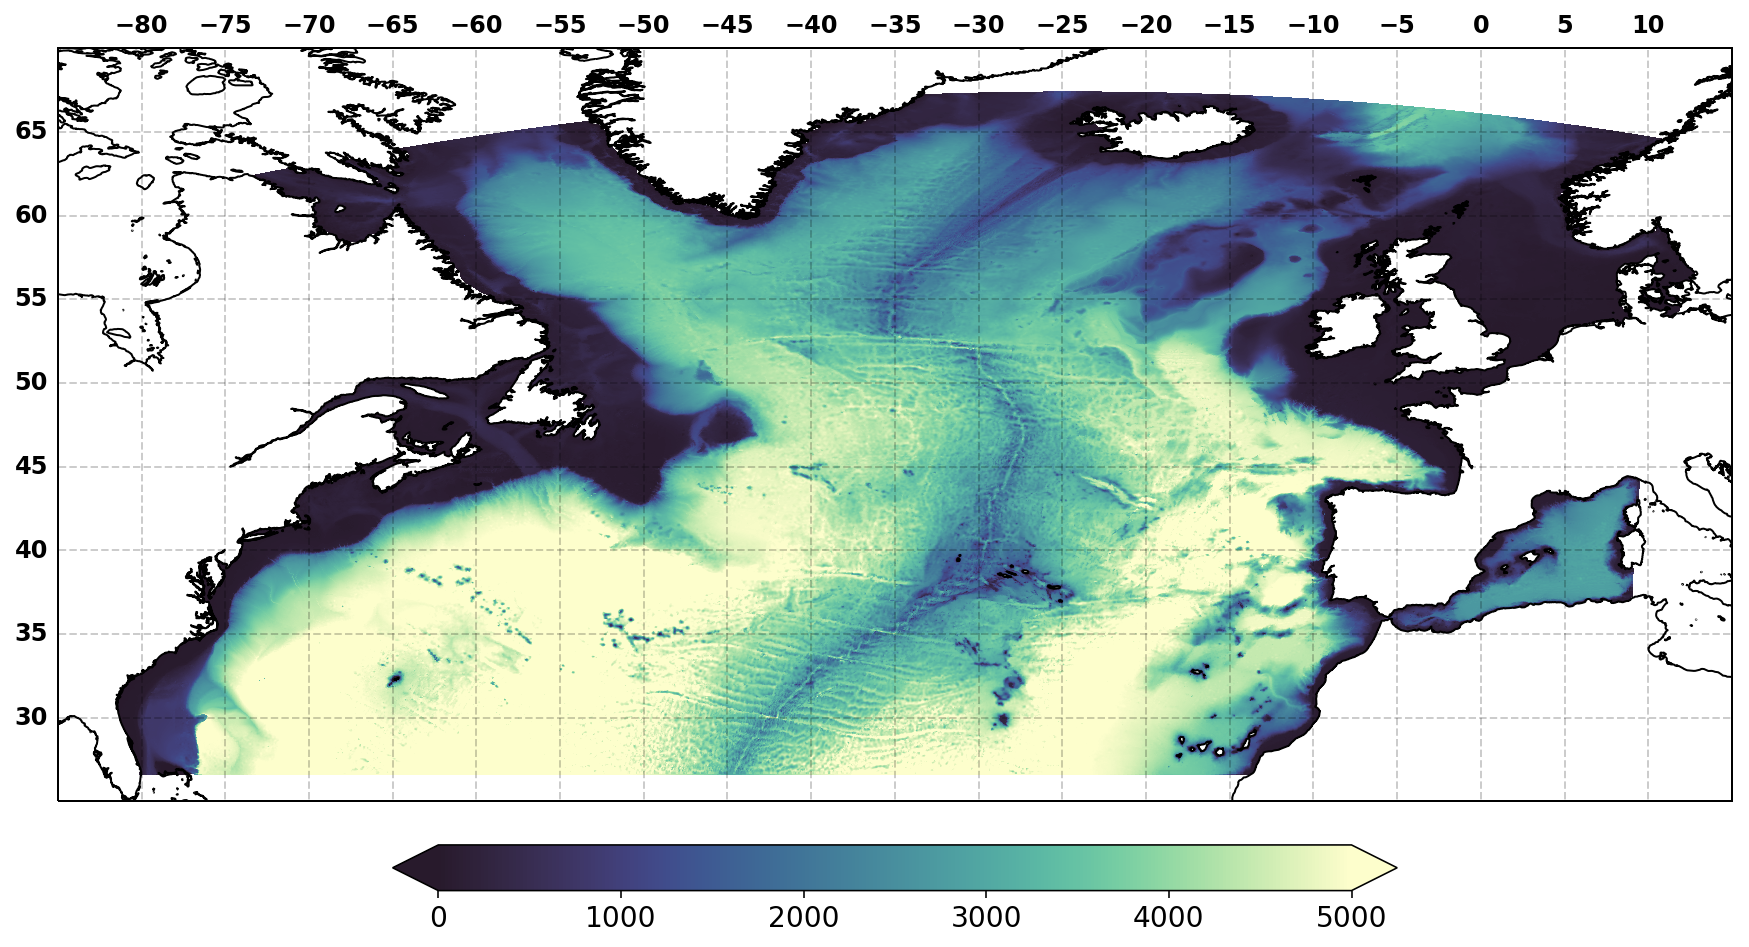

In [11]:
data = depw.to_masked_array()
data = np.ma.masked_where(1-tmask,data)
lat = ds.nav_lat
lon = ds.nav_lon

#cmap = plt.get_cmap('tab20b')

cmap= cm.deep_r
vmin=0.
vmax=5000.

fig = north_atlantic_plot(lat=lat,lon=lon,data=data,vmin=vmin,vmax=vmax,cmap=cmap)

In [19]:
coord=sio.loadmat('/media/extra/DATA/HYCOM/A20_U_EKE_50W/xyz_A02.mat')
lon55=coord['plon']
lat55=coord['plat']

latOV=np.zeros(103)
lonOV=np.zeros(103)

list=!ls /mnt/albert/equipes/meom/DATA_SET/OVIDE/29AH20120623_00*_00001_hy1.nc
for t in np.arange(103):
    file_OVIDE=list[t]
    ds=xr.open_dataset(file_OVIDE)
    latOV[t]=ds.latitude.values
    lonOV[t]=ds.longitude.values

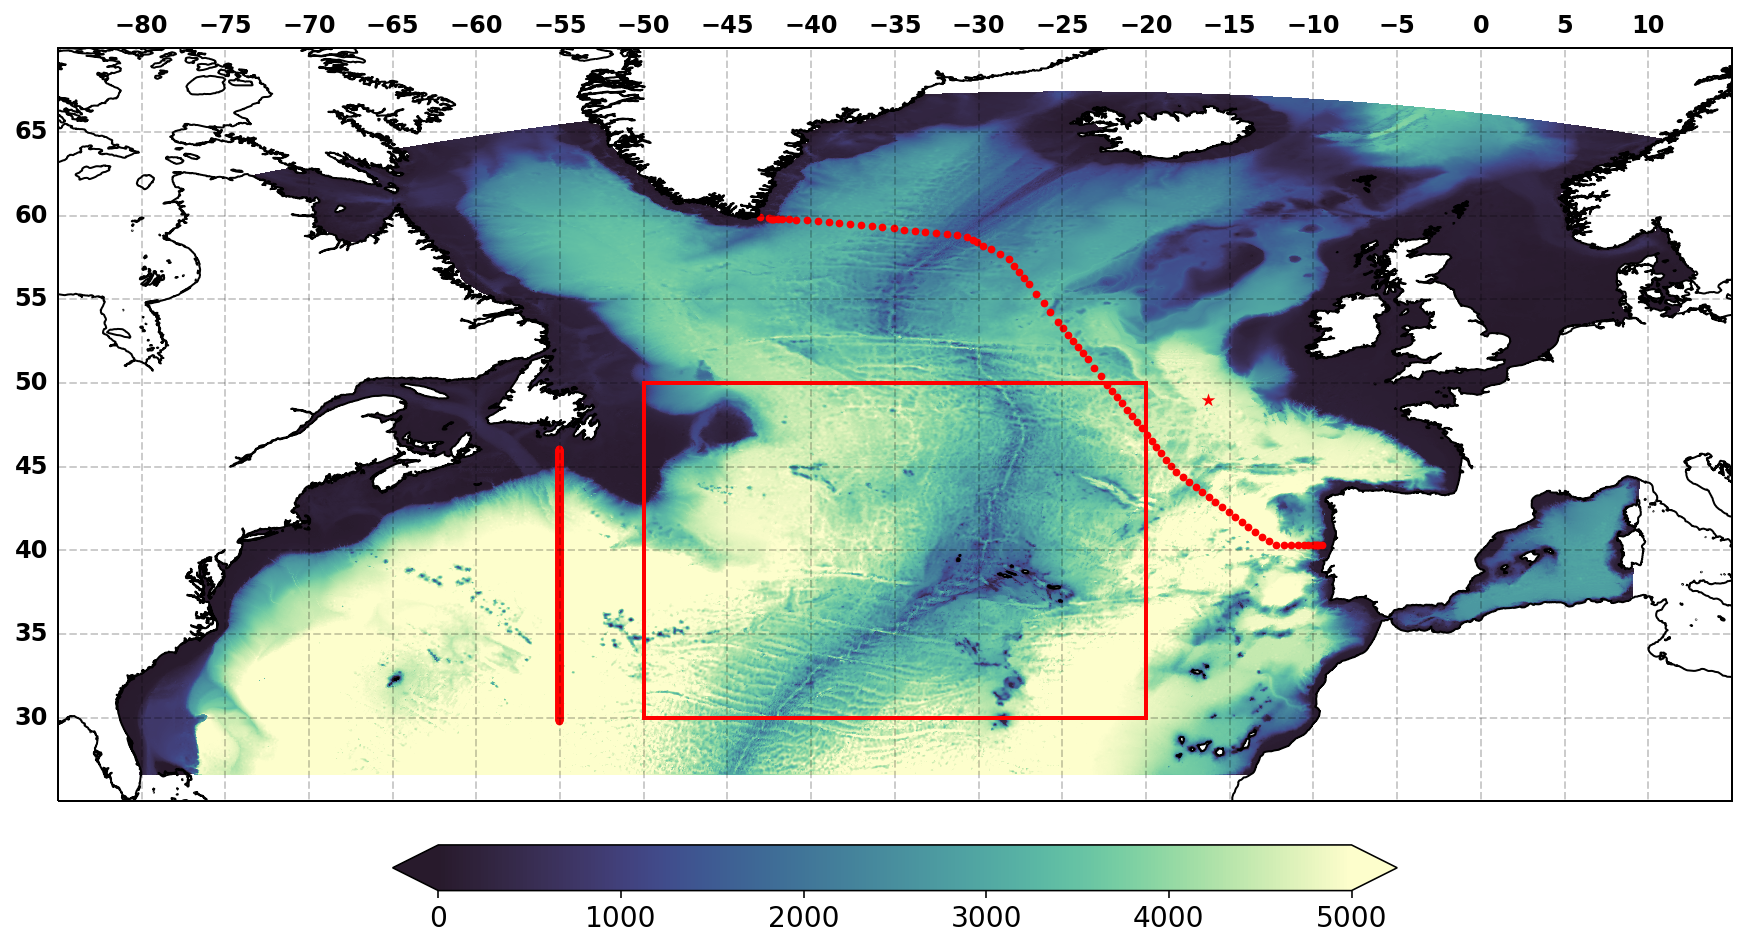

In [27]:
fig = plt.figure(figsize=(15,10))
pj = ccrs.PlateCarree()
ax = plt.axes(projection=pj)
ax.coastlines(resolution="10m")

    #- gridlines
    # see http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
    #gl = ax.gridlines(draw_labels=True)
gl = ax.gridlines(crs=pj, draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

gl.xlabel_style = label_style
gl.xlabels_bottom = False
gl.xlocator = mticker.FixedLocator(np.arange(-90,20,5,dtype=float))

gl.ylabel_style = label_style
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator(np.arange(15,80,5,dtype=float))

    # pcolormesh
cs = plt.pcolormesh(lon, lat, data,transform=pj,cmap=cmap,vmin=vmin,vmax=vmax)
plt.scatter(lon55,lat55, linewidth='0', s=15,color='r')
plt.scatter(lonOV[0:90],latOV[0:90], linewidth='0', s=15,color='r')
plt.scatter(-16.3,49, linewidth='0', s=50,color='r',marker='*')
ax.plot([-50, -20], [30, 30],linewidth='2',color='r')
ax.plot([-50, -20], [50, 50],linewidth='2',color='r')
ax.plot([-50, -50], [30, 50],linewidth='2',color='r')
ax.plot([-20, -20], [30, 50],linewidth='2',color='r')
    # limits
plt.xlim((-85,15))
plt.ylim((25,70)) 

    #colorbar
cb = plt.colorbar(cs, extend='both', fraction=0.042, pad=0.04, orientation="horizontal")

cb.ax.tick_params(labelsize=14)
plt.savefig("NATL60_bathymetry.png", dpi=200, format="png",bbox_inches='tight')